In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("suv_data.csv")

In [4]:
df.head(1)

User ID Gender  Age  EstimatedSalary  Purchased
0  15624510   Male   19            19000          0

In [5]:
df.drop('User ID',axis=1, inplace=True)

In [6]:
df.head(10)

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0
5    Male   27            58000          0
6  Female   27            84000          0
7  Female   32           150000          1
8    Male   25            33000          0
9  Female   35            65000          0

# Exploratory Data Analysis
## Univariate Analysis

In [7]:
print(df['Purchased'].value_counts())
sns.countplot(df['Purchased'])

0    257
1    143
Name: Purchased, dtype: int64


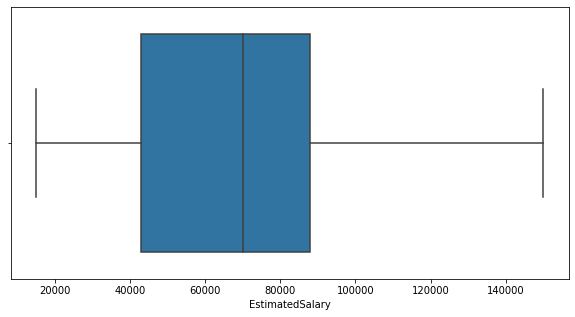

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(df['EstimatedSalary'])

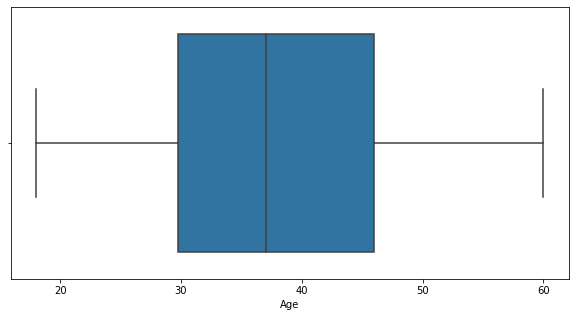

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Age'])

Female    204
Male      196
Name: Gender, dtype: int64


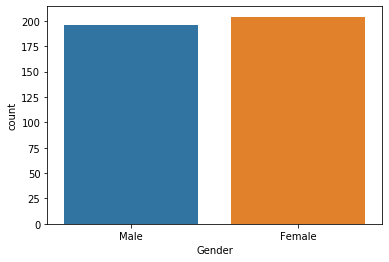

In [10]:
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])

# Data Wrangling

In [11]:
df.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [12]:
male = pd.get_dummies(df['Gender'], drop_first=True)
male

Male
0       1
1       1
2       0
3       0
4       1
..    ...
395     0
396     1
397     0
398     1
399     0

[400 rows x 1 columns]

In [13]:
df1 = pd.concat([df,male],1)

In [14]:
df1.head()

Gender  Age  EstimatedSalary  Purchased  Male
0    Male   19            19000          0     1
1    Male   35            20000          0     1
2  Female   26            43000          0     0
3  Female   27            57000          0     0
4    Male   19            76000          0     1

In [15]:
df1.drop('Gender',axis=1,inplace=True)

## Bivariate Analysis

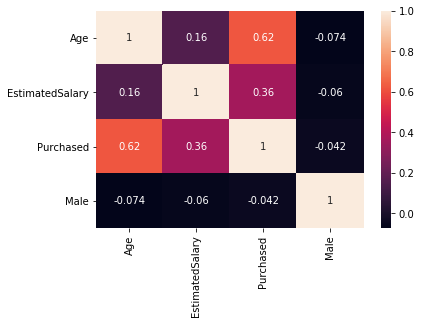

In [16]:
sns.heatmap(df1.corr(), annot=True)

# Model Building

In [17]:
X = df1[['Age','EstimatedSalary']]
y = df1['Purchased'].values

# Spliting the data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33,test_size=0.25)

# Training the model

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction

In [20]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.61

# Feature Selection
Since, Age has highest correlation with Purchased. Thus, Selecting it as the only feature.

In [22]:
X = df1['Age'].values
y = df1['Purchased'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=33,test_size=0.25)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [25]:
model.fit(X_train.reshape(-1,1),y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred = model.predict(X_test.reshape(-1,1))

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.89


# Conclusion 
By only selecting Age as a feature, we are able to predict 89% of the data. My intution said, age and estimated salary will have a better accuracy, but the analysis says otherwise